# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = r'D:\成大\資料科學\百日馬拉松\D11\Part01'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [7]:
correlation = abs(app_train.corr()['TARGET'])
rank_corr = correlation.sort_values()
rank_corr

FLAG_DOCUMENT_20    0.000215
FLAG_DOCUMENT_5     0.000316
FLAG_CONT_MOBILE    0.000370
FLAG_MOBIL          0.000534
FLAG_DOCUMENT_12    0.000756
                      ...   
DAYS_BIRTH          0.078239
EXT_SOURCE_1        0.155317
EXT_SOURCE_2        0.160472
EXT_SOURCE_3        0.178919
TARGET              1.000000
Name: TARGET, Length: 110, dtype: float64

In [8]:
rank_corr[14]

0.002672082170153919

In [9]:
rank_corr[93]

0.043767921047647734

In [10]:
# 相關係數數值最小的15個
rank_corr_low15 = rank_corr[rank_corr<=0.002672082170153919]
rank_corr_low15

FLAG_DOCUMENT_20              0.000215
FLAG_DOCUMENT_5               0.000316
FLAG_CONT_MOBILE              0.000370
FLAG_MOBIL                    0.000534
FLAG_DOCUMENT_12              0.000756
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
FLAG_DOCUMENT_19              0.001358
FLAG_DOCUMENT_10              0.001414
FLAG_DOCUMENT_7               0.001520
NONLIVINGAPARTMENTS_MODE      0.001557
FLAG_EMAIL                    0.001758
AMT_REQ_CREDIT_BUREAU_QRT     0.002022
SK_ID_CURR                    0.002108
FLAG_DOCUMENT_4               0.002672
Name: TARGET, dtype: float64

In [11]:
# 相關係數數值最大的15個
rank_corr_high15 = rank_corr[rank_corr>=0.043767921047647734]
rank_corr_high15 = rank_corr_high15[rank_corr_high15 != 1.0]
rank_corr_high15

FLOORSMAX_MEDI                 0.043768
FLOORSMAX_AVG                  0.044003
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED_ANOM             0.045987
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
EXT_SOURCE_1                   0.155317
EXT_SOURCE_2                   0.160472
EXT_SOURCE_3                   0.178919
Name: TARGET, dtype: float64

In [12]:
app_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

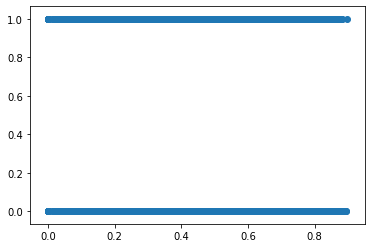

In [13]:
# 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?
# 先以散布圖顯示相關度最大的欄位特徵與目標函數的關係
plt.scatter(app_train['EXT_SOURCE_3'],app_train['TARGET'])

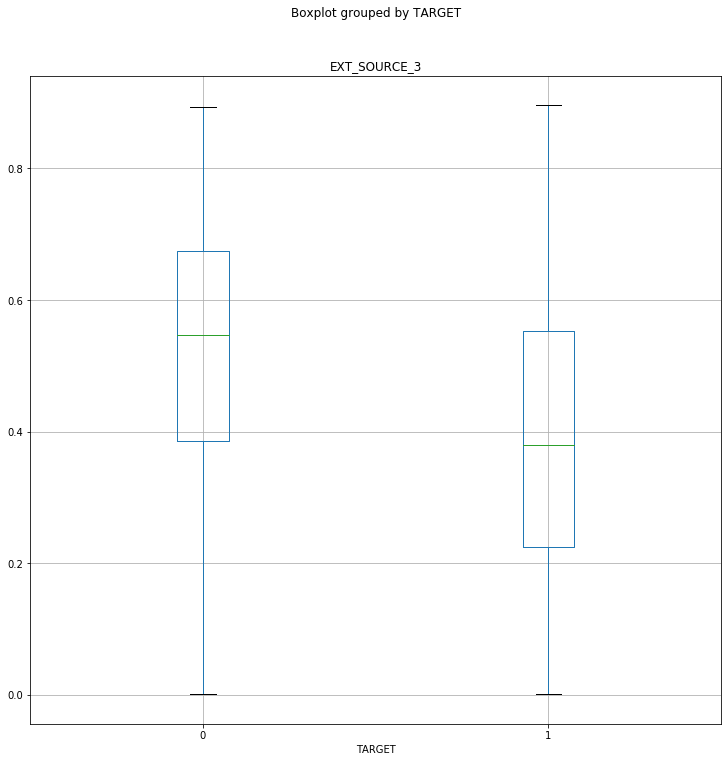

In [14]:
# 由於目標函數不是連續數值，故難以看出關係
# 換成箱型圖來表達
app_train.boxplot(column='EXT_SOURCE_3', by = 'TARGET', showfliers = False, figsize=(12,12))

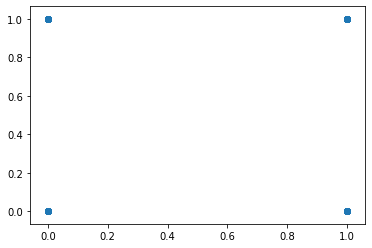

In [15]:
# 以散佈圖來表達相關性最小的欄位特徵與目標函數之間的關係
plt.scatter(app_train['FLAG_DOCUMENT_20'],app_train['TARGET'])

In [16]:
app_train['FLAG_DOCUMENT_20'].unique()

array([0, 1], dtype=int64)

In [17]:
app_train[(app_train['FLAG_DOCUMENT_20']==1) & (app_train['TARGET']==1)] .shape[0]

13

In [18]:
app_train[(app_train['FLAG_DOCUMENT_20']==1) & (app_train['TARGET']==0)].shape[0]

143

In [19]:
app_train[(app_train['FLAG_DOCUMENT_20']==0) & (app_train['TARGET']==0)].shape[0]

282543

In [20]:
app_train[(app_train['FLAG_DOCUMENT_20']==0) & (app_train['TARGET']==1)].shape[0]

24812

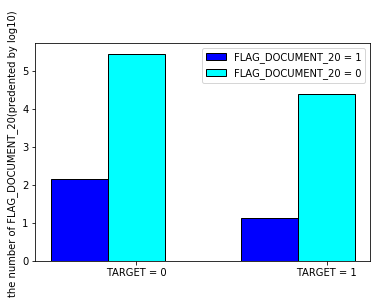

In [24]:
# 由於數量相差太大，會容易讓FLAG_DOCUMENT_20=1(藍色)的長條圖不易看見(幾乎不見)
# 所以我將每個bar的數量都以log10來表示
# width of the bars
barWidth = 0.3
# Choose the height of the blue bars
bars1 = [np.log10(app_train[(app_train['FLAG_DOCUMENT_20']==1) & (app_train['TARGET']==0)].shape[0]),np.log10(app_train[(app_train['FLAG_DOCUMENT_20']==1) & (app_train['TARGET']==1)] .shape[0])]
bars2 = [np.log10(app_train[(app_train['FLAG_DOCUMENT_20']==0) & (app_train['TARGET']==0)].shape[0]),np.log10(app_train[(app_train['FLAG_DOCUMENT_20']==0) & (app_train['TARGET']==1)].shape[0])]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='FLAG_DOCUMENT_20 = 1')
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='FLAG_DOCUMENT_20 = 0')
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['TARGET = 0', 'TARGET = 1'])
plt.ylabel('the number of FLAG_DOCUMENT_20(predented by log10) ')
plt.legend()
# Show graphic
plt.show()